In [2]:
%matplotlib inline

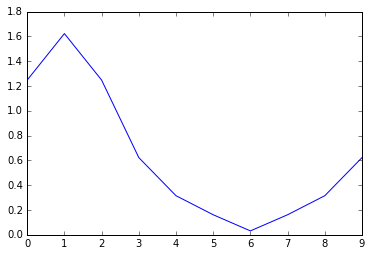

In [6]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output

NUM_STATES = 10
NUM_ACTIONS = 2
GAMMA = 0.5


def hot_one_state(index):
    array = np.zeros(NUM_STATES)
    array[index] = 1.
    return array

# we will create a set of states, the agent get a reward for getting to the 5th one(4 in zero based array).
# the agent can go forward or backward by one state with wrapping(so if you go back from the 1st state you go to the end).
states = [(x == 1) for x in range(NUM_STATES)]
# [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]

session = tf.Session()
state = tf.placeholder("float", [None, NUM_STATES])
targets = tf.placeholder("float", [None, NUM_ACTIONS])

hidden_weights = tf.Variable(tf.constant(0., shape=[NUM_STATES, NUM_ACTIONS]))

output = tf.matmul(state, hidden_weights)

loss = tf.reduce_mean(tf.square(output - targets))
train_operation = tf.train.AdamOptimizer(0.1).minimize(loss)

session.run(tf.initialize_all_variables())

for i in range(50):
    state_batch = []
    rewards_batch = []

    # create a batch of states
    for state_index in range(NUM_STATES):
        state_batch.append(hot_one_state(state_index))

        minus_action_index = (state_index - 1) % NUM_STATES
        plus_action_index = (state_index + 1) % NUM_STATES

        minus_action_state_reward = session.run(output, feed_dict={state: [hot_one_state(minus_action_index)]})[0]
        plus_action_state_reward = session.run(output, feed_dict={state: [hot_one_state(plus_action_index)]})[0]

        # these action rewards are the results of the Q function for this state and the actions minus or plus
        action_rewards = [states[minus_action_index] + GAMMA * np.max(minus_action_state_reward),
                          states[plus_action_index] + GAMMA * np.max(plus_action_state_reward)]
        rewards_batch.append(action_rewards)

    session.run(train_operation, feed_dict={
        state: state_batch,
        targets: rewards_batch})

    check = [states[x] + np.max(session.run(output, feed_dict={state: [hot_one_state(x)]}))
           for x in range(NUM_STATES)]
    clear_output(wait=True)
    plt.plot(check)
    plt.show()
    

# The final output will look something like this, the values converage about the reward state.
# [0.16162321, 0.31524473, 0.62262321, 1.2479111, 1.6226232, 1.2479111, 0.62262321, 0.31524473, 0.16162321, 0.031517841]